In [17]:
%matplotlib inline
from numpy import *
import matplotlib.pyplot as plt
import psycopg2
import sys
from pprint import pprint              
def Connect2Postgres(sql):
	#Define our connection string
	conn_string = "host='delphidata.ucsd.edu' dbname='delphibetadb' user='plato' password='m32mtds3(1_mq+'"
	# get a connection, if a connect cannot be made an exception will be raised here
	conn = psycopg2.connect(conn_string)
	# conn.cursor will return a cursor object, you can use this cursor to perform queries
	cursor = conn.cursor()
	cursor.execute(sql)
	# retrieve the records from the database
	records = cursor.fetchall()
	# print out the records using pretty print
	# note that the NAMES of the columns are not shown, instead just indexes.
	# for most people this isn't very useful so we'll show you how to return
	# columns as a dictionary (hash) in the next example.
	return records 

def epsilonRatio(data, epsilon = 0.5, iteration = 50):
    def getSample(threshhold):
        # result=[data[0]]
        result = 1
        currentValue= data[0]
        for t in data:
            if abs( t-currentValue )>= threshhold:
                result = result + 1 #result.append(t)
                currentValue=t
        return result

    total = data.size
    X = [epsilon * t for t in range(1, iteration+1)]
    Y = [1.0 * getSample(epsilon * t) / total for t in range(1, iteration+1)]
    plt.plot(X,Y)
    plt.xlabel('epsilon')
    plt.ylabel('ratio of samples')
    plt.show()

In [10]:
records=Connect2Postgres("select distinct station from caltrans_1_hour limit 10;")
print records

[(1100340L,), (1118552L,), (1116574L,), (1111561L,), (1108507L,), (1125265L,), (1122645L,), (1108688L,), (1108509L,), (1118957L,)]


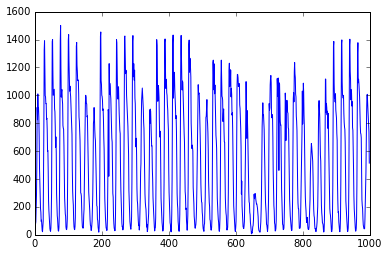

In [18]:
totalflow=Connect2Postgres("select totalflow from caltrans_1_hour where station=1100340 limit 1000;")
#print records
plt.plot(totalflow)

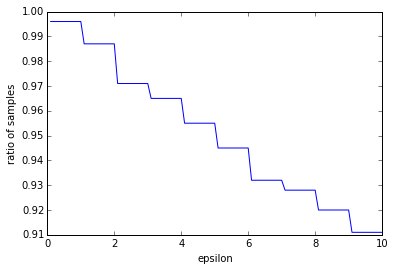

In [21]:
epsilonRatio(array(totalflow), 0.1, 100)

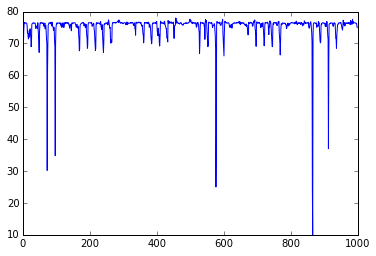

In [31]:
lane1avgspeed=Connect2Postgres("select lane1avgspeed from caltrans_1_hour where station=1117818 limit 1000;")
#print records
plt.plot(lane1avgspeed)
#lane1flow | lane1avgoccupancy | lane1avgspeed 

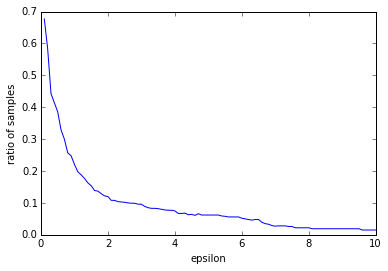

In [32]:
epsilonRatio(array(lane1avgspeed), 0.1, 100)

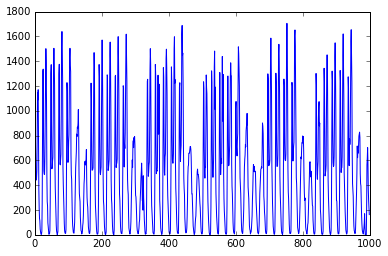

In [33]:
lane1flow=Connect2Postgres("select lane1flow from caltrans_1_hour where station=1117818 limit 1000;")
#print records
plt.plot(lane1flow)

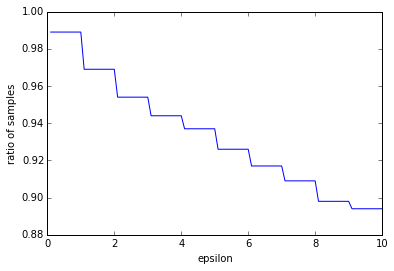

In [34]:
epsilonRatio(array(lane1flow), 0.1, 100)

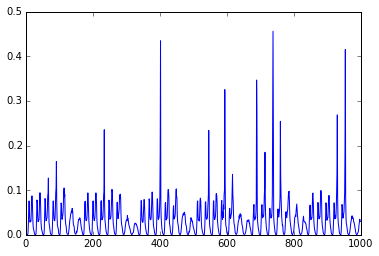

In [35]:
lane1avgoccupancy=Connect2Postgres("select lane1avgoccupancy from caltrans_1_hour where station=1117818 limit 1000;")
#print records
plt.plot(lane1avgoccupancy)

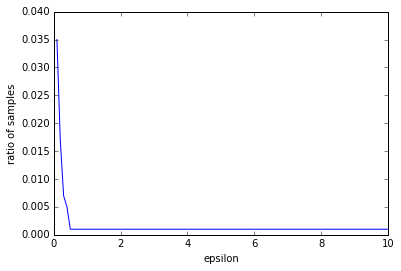

In [36]:
epsilonRatio(array(lane1avgoccupancy), 0.1, 100)